In [1]:
!mkdir data

In [5]:
!unzip /content/data/cp1_data.zip -d data/

Archive:  /content/data/cp1_data.zip
  inflating: data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv  


Performing Data Cleaning and EDA

In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
dataset = pd.read_csv(os.path.join('/content/data', 'Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'))

In [8]:
dataset.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [9]:
dataset.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [10]:
dataset.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [11]:
dataset.columns = [i.lower() for i in dataset.columns]

In [12]:
dataset.dtypes

yearstart                       int64
yearend                         int64
locationabbr                   object
locationdesc                   object
datasource                     object
class                          object
topic                          object
question                       object
data_value_unit               float64
data_value_type                object
data_value                    float64
data_value_alt                float64
data_value_footnote_symbol     object
data_value_footnote            object
low_confidence_limit          float64
high_confidence_limit         float64
sample_size                   float64
total                          object
age(years)                     object
education                      object
gender                         object
income                         object
race/ethnicity                 object
geolocation                    object
classid                        object
topicid                        object
questionid  

In [13]:
dataset['question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [ ]:
# Filter the data based on the specified question
filtered_data = dataset[(dataset['question'] == 'Percent of adults aged 18 years and older who have obesity') & (dataset['stratificationid1']=='INCLESS15')]

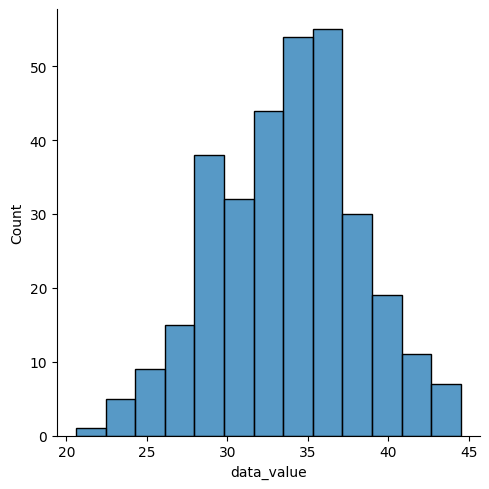

In [ ]:
# Distribution of the percentage of adults above 18 years and having income less than 15k across different states of US.
sns.displot(data=filtered_data, x='data_value')

In [ ]:
lowest_5_locations = filtered_data.nsmallest(5, 'data_value')
largest_5_locations = filtered_data.nlargest(5, 'data_value')
national_location = filtered_data[filtered_data['locationdesc'] == 'National']
selected_locations = pd.concat([lowest_5_locations, largest_5_locations, national_location])

<Axes: xlabel='data_value', ylabel='locationdesc'>

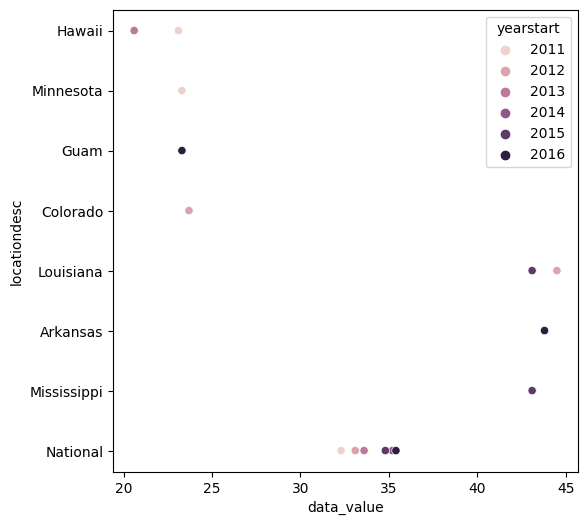

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=selected_locations, x='data_value', y='locationdesc', hue='yearstart', ax=ax)

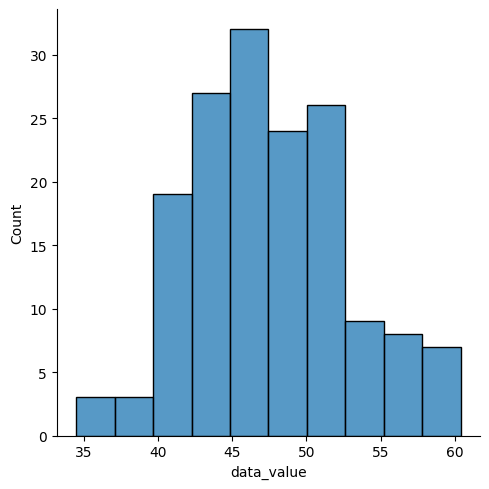

In [ ]:
# Fruits and vegetables behaviour
filtered_data2 = dataset[(dataset['question'] == 'Percent of adults who report consuming fruit less than one time daily') & (dataset['stratificationid1']=='INCLESS15')]
filtered_data2['data_value'].dropna()
sns.displot(data=filtered_data2, x='data_value')

<Axes: xlabel='data_value', ylabel='locationdesc'>

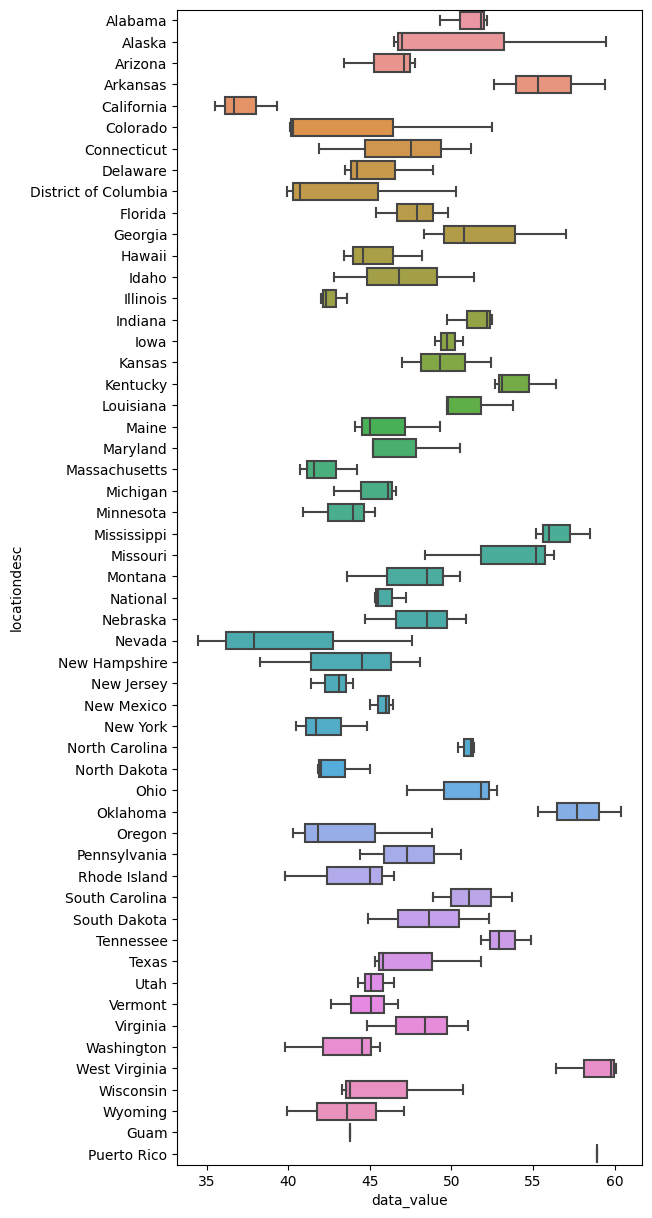

In [ ]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.boxplot(data=filtered_data2, x='data_value', y='locationdesc', ax=ax)

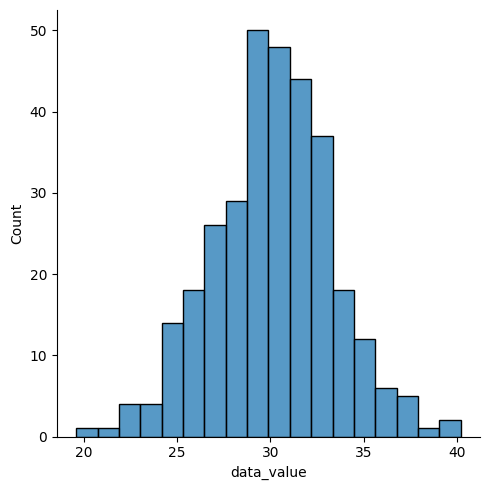

In [ ]:
filtered_data3 = dataset[(dataset['question'] == 'Percent of adults aged 18 years and older who have an overweight classification') & (dataset['stratificationid1']=='INCLESS15')]
filtered_data3['data_value'].dropna()
sns.displot(data=filtered_data3, x='data_value')

<Axes: xlabel='data_value', ylabel='locationdesc'>

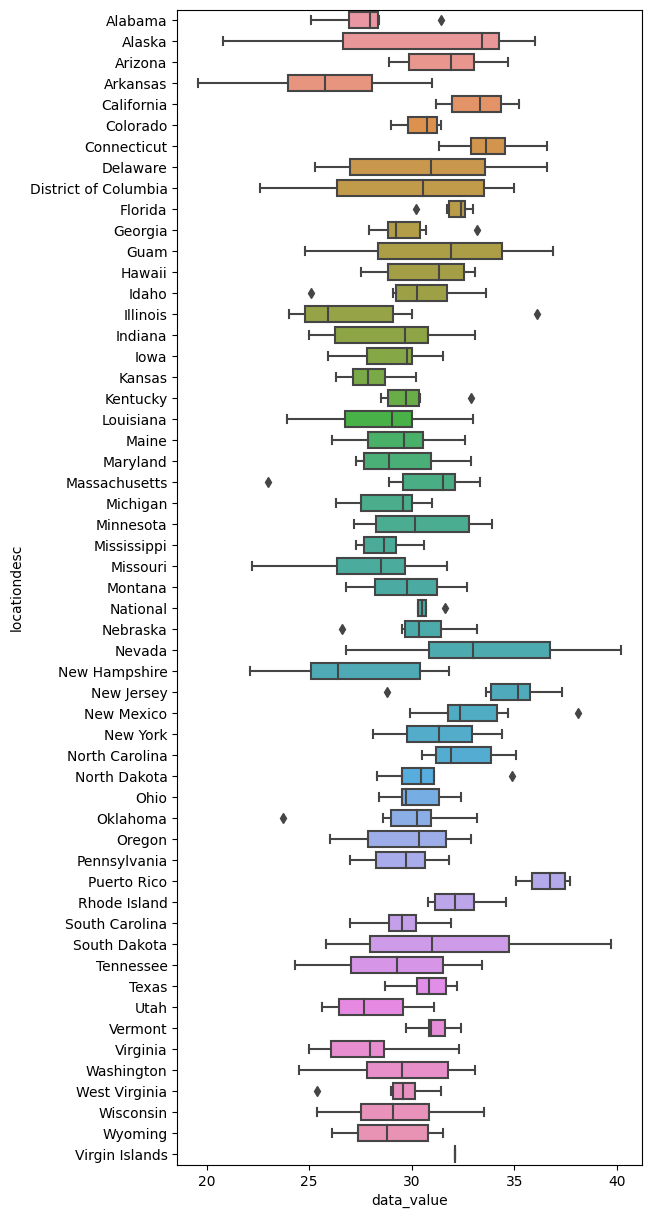

In [ ]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.boxplot(data=filtered_data3, x='data_value', y='locationdesc', ax=ax)

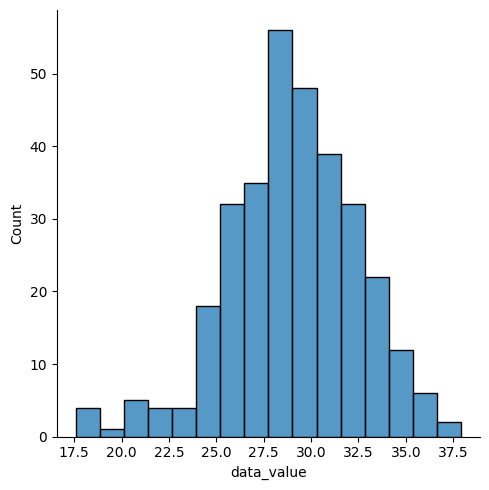

In [ ]:
filtered_data4 = dataset[(dataset['question'] == 'Percent of adults aged 18 years and older who have obesity') & (dataset['stratificationid1']=='MALE')]
filtered_data4['data_value'].dropna()
sns.displot(data=filtered_data4, x='data_value')

<Axes: xlabel='data_value', ylabel='locationdesc'>

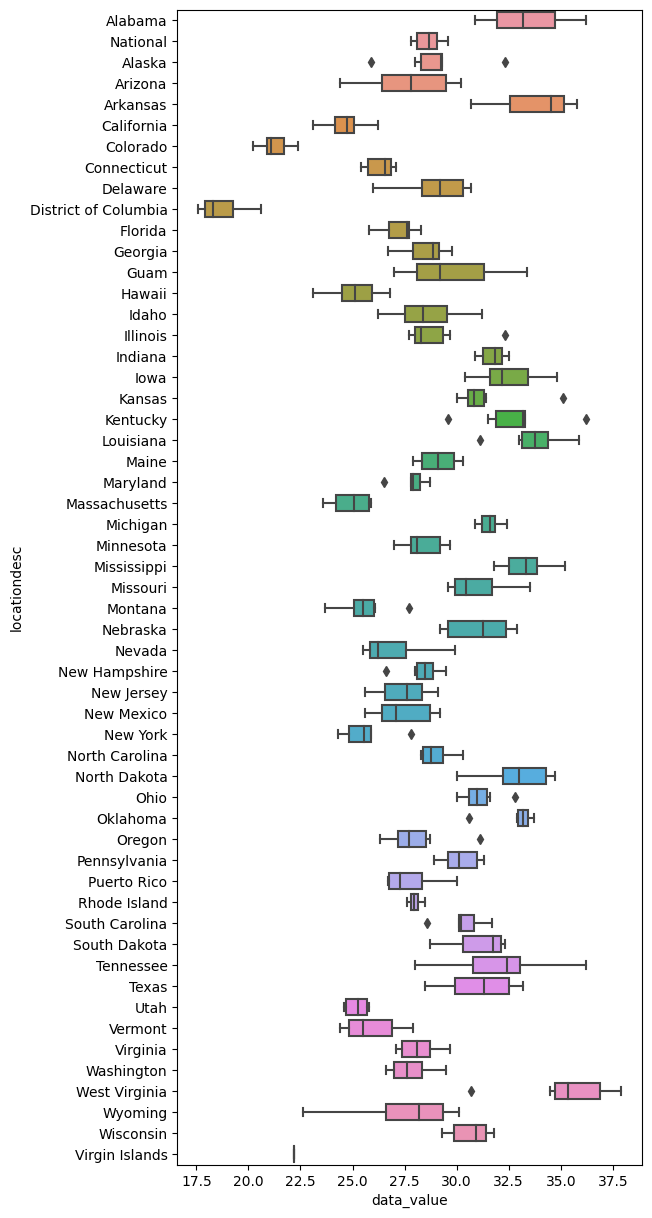

In [ ]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.boxplot(data=filtered_data4, x='data_value', y='locationdesc', ax=ax)

<Axes: xlabel='data_value', ylabel='locationdesc'>

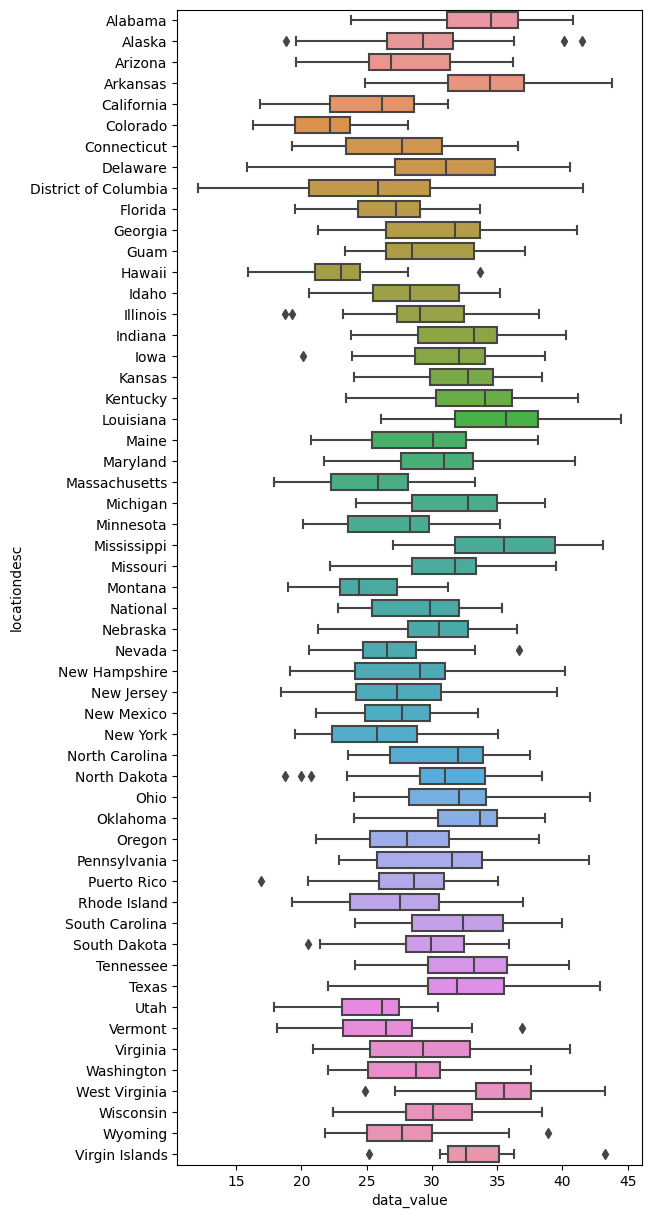

In [ ]:
filtered_data5 = dataset[(dataset['question'] == 'Percent of adults aged 18 years and older who have obesity') & (dataset['stratificationcategory1']=='Income')]
filtered_data5['data_value'].dropna()

fig, ax = plt.subplots(figsize=(6, 15))
sns.boxplot(data=filtered_data5, x='data_value', y='locationdesc', ax=ax)

# sns.boxplot()

<Axes: xlabel='stratificationid1', ylabel='data_value'>

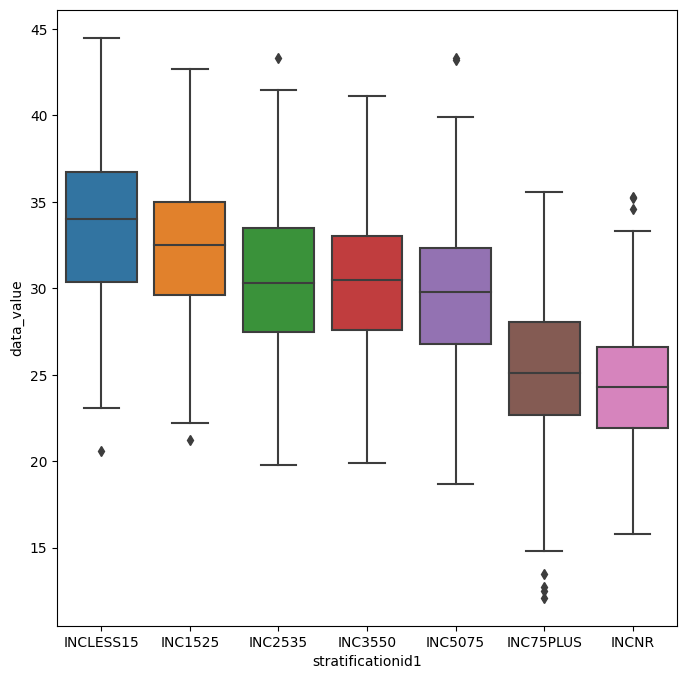

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.boxplot(data=filtered_data5, x='stratificationid1', y='data_value', ax=ax)

Remove INCNR Rows from the dataset.

In [ ]:
dataset['stratificationcategory1'].unique()

array(['Total', 'Gender', 'Education', 'Age (years)', 'Income',
       'Race/Ethnicity'], dtype=object)

In [ ]:
# We will now filter out data according to stratification ID
data1 = dataset[dataset['stratificationcategory1']=='Income']
data2 = dataset[dataset['stratificationcategory1']=='Gender']
data3 = dataset[dataset['stratificationcategory1']=='Age (years)']
data4 = dataset[dataset['stratificationcategory1']=='Education']
data5 = dataset[dataset['stratificationcategory1']=='Race/Ethnicity']
data6 = dataset[dataset['stratificationcategory1']=='Total']

<Axes: xlabel='data_value', ylabel='stratificationid1'>

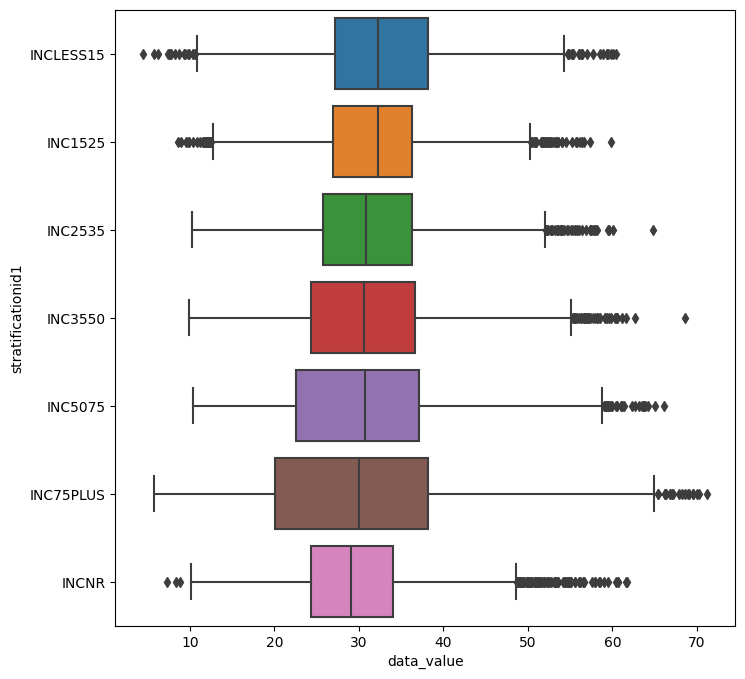

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data1, y='stratificationid1', x='data_value', ax=ax)

<Axes: xlabel='data_value', ylabel='stratificationid1'>

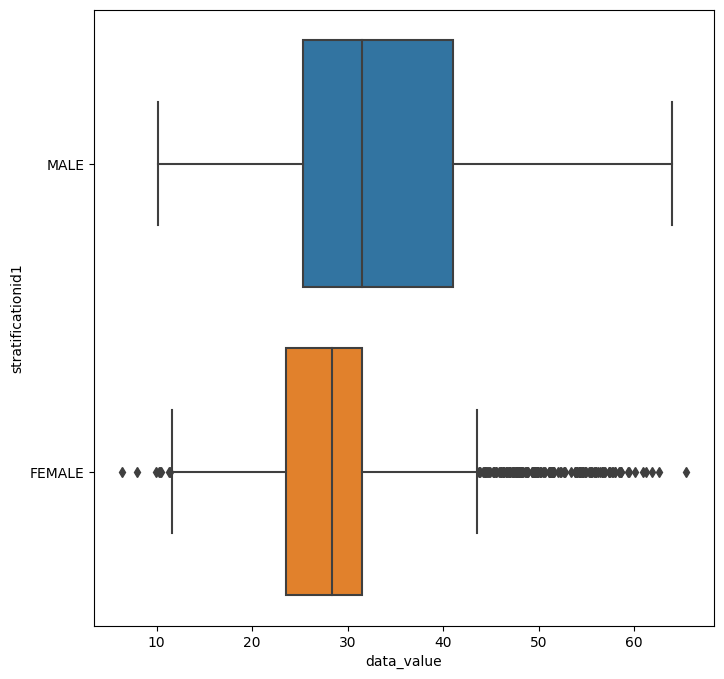

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data2, y='stratificationid1', x='data_value', ax=ax)

<Axes: xlabel='data_value', ylabel='question'>

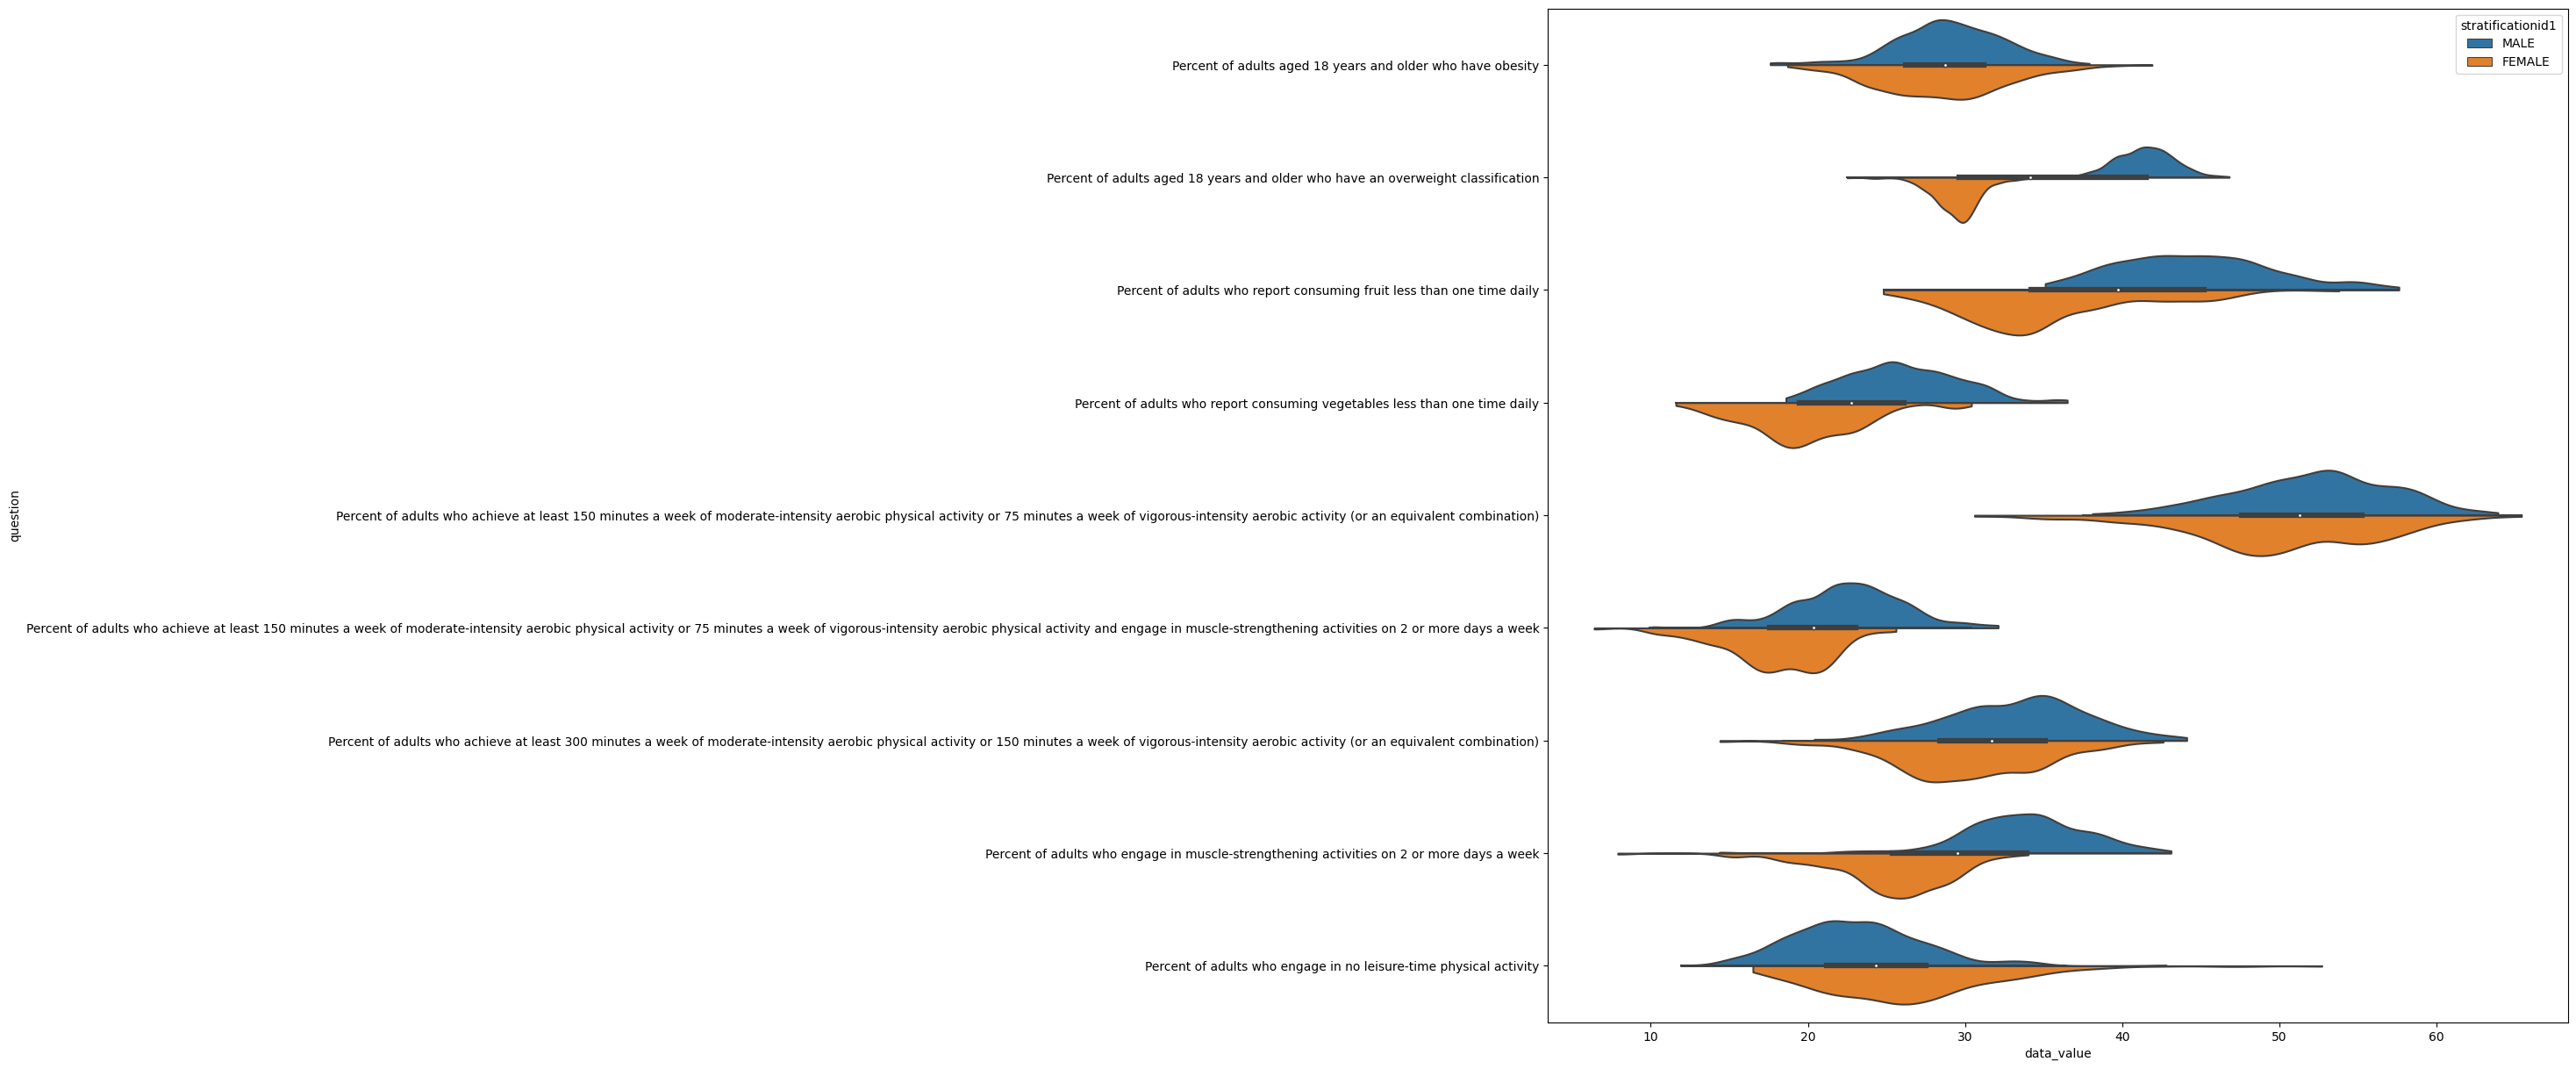

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.violinplot(data=data2, x='data_value', y='question', hue='stratificationid1', bw=.25, cut=0, split=True, ax=ax)